# Energía cinética
[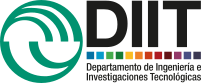](https://ingenieria.unlam.edu.ar/)    
2023 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 

---

## Energía cinética
La energía cinética de una partícula de masa $m$ es 
$$
T= \frac{m}{2} \left(\dot{\vec{r}}\right)^2 = \frac{m}{2} \left(\dot{\vec{r}} \cdot \dot{\vec{r}}\right) = \frac{m}{2} \left(\dot{r_i}^2+ \dot{r_j}^2+ \dot{r_k}^2 \right) .
$$
Por ejemplo en un sistema de coordenadas cartesianas
$$
T= \frac{m}{2} \left(\dot{x}^2+ \dot{y}^2+ \dot{z}^2 \right) .
$$

Para obtener la $T$ de un sistema hay $N$ partículas se suman todas sus $T$. E.g. para un sistema con dos partículas
$$
T = \sum_{i=1}^{N=2} \frac{m_i}{2} \left( \dot{\vec{r}}_i \right)^2 = \frac{m_1}{2} \left( \dot{\vec{r}}_1 \right)^2 + \frac{m_2}{2} \left( \dot{\vec{r}}_2 \right)^2 .
$$

In [19]:
# Parámetros físicos del sistema, i.e. las masas
m1, m2 = sym.symbols('m_1, m_2', positive=True) # las masas son siempre positivas

# Posiciones
E = mech.ReferenceFrame('e')
x1, x2 = mech.dynamicsymbols('x_1, x_2')
m1_r = x1* E.x # m1_r : para la masa 1 su posición r
m2_r = x2* E.y

# Velocidades
m1_v= m1_r.dt(E)
m2_v= m2_r.dt(E)

Como las velocidades son vectores es práctico calcular el cuadrado de las velocidades usando el producto escalar llamado también producto punto (dot en inglés)
$$
\left( \dot{\vec{r}} \right)^2 = \dot{\vec{r}} \cdot \dot{\vec{r}} .
$$

In [20]:
# Energía cinética
unMedio = sym.Rational(1,2) # Rational: fracción de enteros, alternativamente podría haberse usado 0.5 
m1_T = unMedio* m1* m1_v.dot(m1_v) # un medio de la masa por la velocidad al cuadrado
m2_T = unMedio* m2* m2_v.dot(m2_v)
T = sym.Eq(sym.Symbol('T'), m1_T + m2_T ) # Eq define una ecuación
T

Todo esto parece muy largo de escribir.
Hay una forma de evitar hacerlo cada vez.
`Python`, como cualquier lenguaje de programación, permite definir funciones.
A continuación una que calcula la energía cinética a partir de la posición.